### Student Information
Name:陳玟卉

Student ID:D1114242002

GitHub ID:Alice9303

Kaggle name:alice0329

Kaggle private scoreboard snapshot: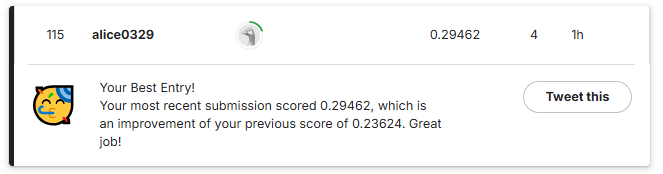

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home exercises** in the [DM2024-Lab2-master Repo](https://github.com/didiersalazar/DM2024-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework) regarding Emotion Recognition on Twitter by this link: https://www.kaggle.com/competitions/dm-2024-isa-5810-lab-2-homework. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (0.6N + 1 - x) / (0.6N) * 10 + 20 points, where N is the total number of participants, and x is your rank. (ie. If there are 100 participants and you rank 3rd your score will be (0.6 * 100 + 1 - 3) / (0.6 * 100) * 10 + 20 = 29.67% out of 30%.)   
    Submit your last submission **BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)**. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developing the model for the competition (You can use code and comment on it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th, 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

In [2]:
#take home 1
# Answer here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Assuming train_df and test_df are already loaded as DataFrames
# And they contain a 'text' column for text data

# 1. Extract text data
train_texts = train_df['text']  # Text data from the training set
test_texts = test_df['text']    # Text data from the test set

# 2. Use CountVectorizer to compute term frequencies
count_vect = CountVectorizer()
train_term_matrix = count_vect.fit_transform(train_texts)  # Term frequency matrix for the training set
test_term_matrix = count_vect.transform(test_texts)        # Term frequency matrix for the test set

# 3. Compute the total frequency of each term
train_term_frequencies = train_term_matrix.sum(axis=0).A1  # Term frequencies for the training set
test_term_frequencies = test_term_matrix.sum(axis=0).A1    # Term frequencies for the test set

# 4. Extract words and their frequencies, and sort them by frequency
feature_names = count_vect.get_feature_names_out()
train_freq_df = pd.DataFrame({'word': feature_names, 'frequency': train_term_frequencies})
test_freq_df = pd.DataFrame({'word': feature_names, 'frequency': test_term_frequencies})

# Sort by frequency and get the top 30 words
train_top30 = train_freq_df.nlargest(30, 'frequency')
test_top30 = test_freq_df.nlargest(30, 'frequency')

# 5. Plot the top 30 word frequencies in the training set
plt.figure(figsize=(16, 6))
sns.barplot(x=train_top30['word'], y=train_top30['frequency'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Word Frequencies in Train Dataset")
plt.show()

# 6. Plot the top 30 word frequencies in the test set
plt.figure(figsize=(16, 6))
sns.barplot(x=test_top30['word'], y=test_top30['frequency'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Word Frequencies in Test Dataset")
plt.show()

ImportError: initialization failed

In [ ]:
#take home 2
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import pandas as pd

# 假设数据已经加载到 train_df 中
# train_df = pd.read_csv('train5.csv')  # 如果需要，加载数据

# 创建具有 1000 个特征的 TF-IDF 分析器
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# 对训练数据进行拟合
tfidf_1000.fit(train_df['text'])

# 将训练数据转换为 TF-IDF 特征
train_data_TFIDF_features_1000 = tfidf_1000.transform(train_df['text'])

# 获取特征名称
feature_names = tfidf_1000.get_feature_names_out()

# 查看特征名称索引 100 到 110 的内容
print("Feature names from index 100 to 110:", feature_names[100:111])


In [ ]:
#take home 3
# Answer here
Fear is the most accurately predicted class, with 76 correct predictions, indicating that the model performs well in identifying this emotion.
Anger and Sadness have a noticeable number of misclassifications, especially where anger is misclassified as fear (18 times) and sadness as fear (13 times). This suggests some overlap or similarity in features that the model finds confusing between these emotions.
Joy has a few errors distributed across other emotions, particularly with predictions as fear (9 times).

In [ ]:
#take home 4
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

NB_model = MultinomialNB()

NB_model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = NB_model.predict(X_train)

# Predictions on the test set
y_test_pred = NB_model.predict(X_test)

# Calculate and print accuracy for both training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Detailed classification report on test data
print("Classification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

In [ ]:
#take home 5
# Answer here
Model Complexity:

Naive Bayes: This is a low-variance, high-bias model due to its strong assumption of feature independence. It’s simple, which makes it less flexible but generally robust to overfitting.
Decision Trees: These are high-variance, low-bias models capable of capturing complex patterns, but this complexity often leads to overfitting, particularly when the tree depth is not limited.
Independence Assumption:

Naive Bayes benefits when features are roughly independent, as the model assumes. Although real-world text data doesn’t strictly meet this assumption, the model’s simplicity helps it handle moderate dependencies without becoming overly complex.
Decision Trees, on the other hand, do not assume feature independence and instead seek to capture detailed interactions between features. While this flexibility is powerful, it requires larger datasets or regularization techniques to prevent overfitting.
Interpretability of Results:

The high training accuracy of the Decision Tree, combined with its lower test accuracy, suggests that it is “memorizing” the training data rather than learning generalizable patterns.
Naive Bayes, with its simpler approach, provides more consistent results between training and testing. The lower training accuracy of Naive Bayes reflects its general tendency to create broad decision boundaries, which can be advantageous in high-dimensional settings like text classification.

In [ ]:
#take home 6
# Answer here
import matplotlib.pyplot as plt

def plot_train_valid_accuracy(df):
    # Plot Training and Validation Accuracy
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(df['epoch'], df['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(df['epoch'], df['loss'], label='Training Loss', color='blue')
    plt.plot(df['epoch'], df['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_train_valid_accuracy(training_log)

In [ ]:
#take home 7
# Answer here
word2tfidf = dict(zip(TFIDF_1000.get_feature_names_out(), TFIDF_1000.idf_))

# Generate weighted sentence vector
sentence = "I am very happy today"
words = sentence.split()
vectors = [w2v_google_model[word] * word2tfidf.get(word, 1) for word in words if word in w2v_google_model]

if vectors:
    sentence_vector = np.mean(vectors, axis=0)
else:
    sentence_vector = np.zeros(w2v_google_model.vector_size)

print("Weighted sentence vector:", sentence_vector)

In [ ]:
#take home 8
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)
print('total # of target words: ', len(target_words))

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

In [ ]:
#take home 9
# Answer here
import ollama

user_message = 'Can you tell me what deep learning is? Please give a brief summary in markdown format.'

response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': user_message
    },
])
display(Markdown(response['message']['content']))

In [ ]:
#take home 10
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/cake_stor.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

In [ ]:
#take home 11
# Answer here
import ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders.text import TextLoader

from langchain_community.document_loaders import WebBaseLoader, PyPDFLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from IPython.display import display, Markdown

llm_model = "llama3.2"  # You can change this to a preferred model

# Function to load, split, and retrieve documents from multiple sources
def load_and_retrieve_docs(sources, source_type="url"):
    documents = []

    for source in sources:
        if source_type == "url":
            # Load documents from URLs
            loader = WebBaseLoader(web_paths=(source,), bs_kwargs=dict())
        elif source_type == "text":
            # Load documents from local text files
            loader = TextFileLoader(filepath=source)
        elif source_type == "pdf":
            # Load documents from PDF files
            loader = PyPDFLoader(filepath=source)
        else:
            raise ValueError("Unsupported source type. Use 'url', 'text', or 'pdf'.")

        docs = loader.load()
        documents.extend(docs)

    # Split documents into manageable chunks
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(documents)

    # Generate embeddings and create a vector store
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
    return vectorstore.as_retriever()

# Define sources (replace these with your own URLs, text files, or PDFs)
url_sources = [
    "https://www.ibm.com/topics/large-language-models",
    "https://en.wikipedia.org/wiki/Natural_language_processing",
    "https://towardsdatascience.com/transformers-141e32e69591"
]
pdf_sources = ["file1.pdf", "file2.pdf", "file3.pdf"]  # Replace with actual PDF file paths
text_sources = ["file1.txt", "file2.txt", "file3.txt"]  # Replace with actual text file paths

# Create retrievers
url_retriever = load_and_retrieve_docs(url_sources, source_type="url")
# pdf_retriever = load_and_retrieve_docs(pdf_sources, source_type="pdf")
# text_retriever = load_and_retrieve_docs(text_sources, source_type="text")

# Function to format retrieved documents
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model=llm_model, messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain with one of the retrievers
result = rag_chain("What are the key features of transformers in NLP?", retriever=url_retriever)
display(Markdown(result))


In [ ]:
#take home 6
# Answer here
import matplotlib.pyplot as plt

def plot_train_valid_accuracy(df):
    # Plot Training and Validation Accuracy
    plt.figure(figsize=(12, 5))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(df['epoch'], df['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(df['epoch'], df['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True)
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(df['epoch'], df['loss'], label='Training Loss', color='blue')
    plt.plot(df['epoch'], df['val_loss'], label='Validation Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_train_valid_accuracy(training_log)

In [ ]:
#take home 7
# Answer here
# Doc2Vec is specifically designed for sentences or documents and is the most direct approach.

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

# Example corpus: List of sentences
sentences = [
    "I love programming.",
    "Artificial Intelligence is fascinating.",
    "Cats are cute.",
    "Python is a great programming language.",
    "I hate bugs in my code.",
    "Debugging is frustrating.",
    "Dogs are loyal.",
    "Java is also a popular language."
]

# Preprocessing: Tagging each sentence (required by Doc2Vec)
tagged_data = [TaggedDocument(words=sentence.split(), tags=[str(i)]) for i, sentence in enumerate(sentences)]

# Train a Doc2Vec model
model = Doc2Vec(vector_size=50,   # Size of sentence embedding
                window=2,         # Context window
                min_count=1,      # Minimum word frequency
                workers=4,        # Number of threads
                epochs=20)        # Number of iterations

# Build vocabulary and train the model
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Get vector for a sentence
sentence_vector = model.infer_vector("I love programming.".split())

print("Sentence vector:", sentence_vector)

In [ ]:
#take home 8
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)
print('total # of target words: ', len(target_words))

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

In [ ]:
#take home 9
# Answer here
import ollama

user_message = 'Can you tell me what deep learning is? Please give a brief summary in markdown format.'

response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': user_message
    },
])
display(Markdown(response['message']['content']))

In [ ]:
#take home 10
# Answer here
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['./pics/cake_stor.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

In [ ]:
#take home 11
# Answer here
import ollama
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders.text import TextLoader

from langchain_community.document_loaders import WebBaseLoader, PyPDFLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from IPython.display import display, Markdown

llm_model = "llama3.2"  # You can change this to a preferred model

# Function to load, split, and retrieve documents from multiple sources
def load_and_retrieve_docs(sources, source_type="url"):
    documents = []

    for source in sources:
        if source_type == "url":
            # Load documents from URLs
            loader = WebBaseLoader(web_paths=(source,), bs_kwargs=dict())
        elif source_type == "text":
            # Load documents from local text files
            loader = TextFileLoader(filepath=source)
        elif source_type == "pdf":
            # Load documents from PDF files
            loader = PyPDFLoader(filepath=source)
        else:
            raise ValueError("Unsupported source type. Use 'url', 'text', or 'pdf'.")

        docs = loader.load()
        documents.extend(docs)

    # Split documents into manageable chunks
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(documents)

    # Generate embeddings and create a vector store
    embeddings = OllamaEmbeddings(model=llm_model)
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
    return vectorstore.as_retriever()

# Define sources (replace these with your own URLs, text files, or PDFs)
url_sources = [
    "https://www.ibm.com/topics/large-language-models",
    "https://en.wikipedia.org/wiki/Natural_language_processing",
    "https://towardsdatascience.com/transformers-141e32e69591"
]
pdf_sources = ["file1.pdf", "file2.pdf", "file3.pdf"]  # Replace with actual PDF file paths
text_sources = ["file1.txt", "file2.txt", "file3.txt"]  # Replace with actual text file paths

# Create retrievers
url_retriever = load_and_retrieve_docs(url_sources, source_type="url")
# pdf_retriever = load_and_retrieve_docs(pdf_sources, source_type="pdf")
# text_retriever = load_and_retrieve_docs(text_sources, source_type="text")

# Function to format retrieved documents
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model=llm_model, messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain with one of the retrievers
result = rag_chain("What are the key features of transformers in NLP?", retriever=url_retriever)
display(Markdown(result))


In [ ]:
#take home 12
# Answer here
plot_train_valid_accuracy(training_log)

In [ ]:
KNN is simple but less effective with high-dimensional data like LLM embeddings.
Neural Networks can leverage the rich semantic structure of LLM embeddings and fine-tune their representations, leading to superior performance.
The choice of model should depend on the task complexity, data dimensionality, and computational constraints. For LLM embeddings, neural networks are generally the more effective choice.

In [ ]:
#take home 13
# Answer here
Impact of Few-Shot Learning:

Moving from zero-shot to 5-shot prompting demonstrates a gradual improvement in performance, especially for well-defined emotions like anger and joy.
Few-shot examples help ground the model in task-specific nuances, though improvement is limited by inherent overlaps in some emotions.
Class-Specific Behavior:

Anger: The most consistently predicted emotion across all settings, likely because it has distinct patterns in the embeddings.
Fear and Sadness: Challenging to distinguish, likely due to shared features or lack of sufficient distinctive context in the embeddings.
Joy: Reasonably well-classified but exhibits some confusion with sadness in all settings.
Embedding and Model Limitations:

Pretrained language model embeddings might not perfectly encode subtle distinctions between similar emotions.
The classification model might benefit from more examples, improved prompts, or domain-specific fine-tuning of the embeddings.


# Kaggle Competition

## Data preparation

Transform JSON data into a DataFrame

In [ ]:
import pandas as pd
import json

In [ ]:
# Initialize an empty list to store DataFrames, each representing processed data from a JSON chunk.
dfs = []

# Read the JSON file using pandas' read_json function with the following parameters:
# - 'lines=True': Each line in the file represents a separate JSON object.
# - 'chunksize=1000': Process the file in chunks of 1000 rows at a time for memory efficiency.
json_chunks = pd.read_json(
    '/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json',
    lines=True,
    chunksize=1000
)

# Iterate over each chunk of JSON data using enumerate to track the index and content of the chunk.
for i, chunk in enumerate(json_chunks):
    # Use json_normalize to flatten the JSON structure and extract data from the '_source' field.
    df = pd.json_normalize(chunk['_source'])
    
    # Append the flattened DataFrame to the list.
    dfs.append(df)

# Concatenate all the DataFrames (processed chunks) into a single DataFrame.
# - axis=0: Concatenate along the rows (vertically).
tweets_df = pd.concat(dfs, axis=0)

# Rename the columns of the resulting DataFrame to make them more meaningful and readable.
tweets_df.columns = ['hashtags', 'tweet_id', 'text']


In [ ]:
# Save the processed DataFrame (tweets_df) as a pickle file named 'tweets_DM.pkl'.
# - Pickle is a Python-specific binary format for serializing and saving objects.
# - This allows the DataFrame to be quickly reloaded later without reprocessing the original JSON file.
tweets_df.to_pickle('tweets_DM.pkl')


In [ ]:
# Load the saved DataFrame from the pickle file 'tweets_DM.pkl'.
# - The pickle file must be located in the current working directory or at the specified path.
# - This restores the DataFrame exactly as it was when saved.
tweets_df = pd.read_pickle('tweets_DM.pkl')

# Display the loaded DataFrame.
# - Simply typing the variable name will show its contents, typically the first and last few rows.
tweets_df


In [ ]:
# Load the 'data_identification.csv' file into a DataFrame named dataid_df.
# - 'encoding="utf-8"': Ensures proper handling of text data encoded in UTF-8.
id_df = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv', encoding='utf-8')

# Load the 'emotion.csv' file into a DataFrame named emotion_df.
# - 'encoding="utf-8"': Handles text encoding properly to avoid decoding errors for non-ASCII characters.
emo_df = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv', encoding='utf-8')

# Load the 'sampleSubmission.csv' file into a DataFrame named submition_df.
# - 'encoding="utf-8"': Ensures proper handling of special characters in the file.
sub_df = pd.read_csv('/kaggle/input/dm-2024-isa-5810-lab-2-homework/sampleSubmission.csv', encoding='utf-8')


In [ ]:
emo_df

In [ ]:
# Rename the columns of the DataFrame sub_df to make them more descriptive and aligned with their purpose.
# - 'tweet_id': Represents the unique identifier for each tweet.
# - 'emotion': Represents the predicted or labeled emotion for each tweet.
sub_df.columns = ['tweet_id', 'emotion']

# Display the contents of the renamed DataFrame.
# - This outputs the DataFrame in the notebook to verify the column renaming was successful.
sub_df


Merge tweets with identification and emotion labels

In [ ]:
# Count the occurrences of each unique value in the 'identification' column of the dataid_df DataFrame.
# - This is useful for understanding the distribution of data types or categories in the column.
dataid_df['identification'].value_counts()


In [ ]:
# Merge the tweets_df DataFrame with emo_df (emotion DataFrame) on the 'tweet_id' column.
# - This joins the emotion labels with the tweet data using 'tweet_id' as the key.
# - By default, this performs an inner join, keeping only rows with matching 'tweet_id' in both DataFrames.
train_df = tweets_df.merge(emo_df, on='tweet_id') \
                    .merge(id_df, on='tweet_id')

# Display the resulting merged DataFrame, train_df.
# - This allows you to verify that the merge operation combined the data as expected.
train_df


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the distribution of categories in a specific column of a DataFrame.
# Default column is 'emotion', but this can be adjusted to other columns.
def plot_category_distribution(df, column='emotion'):
    # Get unique labels (categories) in the specified column.
    labels = df[column].unique()
    
    # Calculate the total number of rows (instances) in the DataFrame.
    post_total = len(df)
    
    # Group the DataFrame by the specified column and count the number of occurrences of each label.
    # The 'text' column is used for counting instances, but you could also count other columns.
    df_grouped = df.groupby([column]).count()['text']
    
    # Convert counts into percentages relative to the total number of instances.
    df_grouped = df_grouped.apply(lambda x: round(x*100/post_total, 3))

    # Create a bar plot to visualize the category distribution.
    fig, ax = plt.subplots(figsize=(5, 3))  # Set figure size.
    plt.bar(df_grouped.index, df_grouped.values)  # Plot the bars.

    # Arrange labels and title for the plot.
    plt.ylabel('% of instances')  # Y-axis label indicating percentage.
    plt.xlabel(f'{column.capitalize()}')  # X-axis label showing the column name.
    plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better readability.
    plt.title(f'{column.capitalize()} distribution')  # Title of the plot.
    plt.grid(True)  # Add grid lines to the plot for better visibility.
    
    # Show the plot.
    plt.show()


In [ ]:
train_df.emotion.value_counts(normalize=False)

In [ ]:
test_df = tweets_df.merge(submition_df, on='tweet_id').merge(dataid_df, on='tweet_id')
test_df

Creating features through the Bag of Words model.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# Download punkt
try:
    nltk.data.find('punkt_tab')
except:
    nltk.download('punkt_tab', download_dir='/kaggle/working/')
    nltk.data.path.append('/kaggle/working/')
  
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

In [ ]:
train_data_BOW_features_500.shape

In [ ]:
# observe some feature names
feature_names = BOW_500.get_feature_names_out()

Model

Decision Trees

In [ ]:
test_df.loc[test_df['emotion'] == 'surprise', 'emotion'] = np.nan

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# For a classification problem, you need to provide both training and testing data.
# 'X_train' contains the feature matrix (converted text data) for the training set.
# 'y_train' contains the labels (emotions) for the training set.

X_train = BOW_500.transform(train_df['text'])  # Convert the training text to feature vectors using Bag of Words (BOW).
y_train = train_df['emotion']  # The target labels (emotions) for the training data.

# 'X_test' contains the feature matrix for the test set.
# 'y_test' contains the true labels for the test set (used for evaluation).

X_test = BOW_500.transform(test_df['text'])  # Convert the test text to feature vectors using BOW.
y_test = test_df['emotion']  # The target labels (emotions) for the test data.

# It’s a good practice to check the dimensions of your data before training a model.
# This will ensure that your feature matrix and target labels have the correct shape.

print('X_train.shape: ', X_train.shape)  # Print the shape of the training feature matrix.
print('y_train.shape: ', y_train.shape)  # Print the shape of the training labels.
print('X_test.shape: ', X_test.shape)  # Print the shape of the test feature matrix.
print('y_test.shape: ', y_test.shape)  # Print the shape of the test labels.


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

Save the Submission File

In [ ]:
from datetime import datetime

# Get the current date and time, formatted as 'YYYYMMDD_HHMMSS'
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

# Update the filename with a new name and the timestamp
filename = f"/kaggle/working/new_submission_{timestamp}.csv"  # Changed the prefix to 'new_submission'

# Rest of your code for preparing the submission
submission_df = test_df.copy()  # Create a copy of the test DataFrame
submission_df.emotion = y_test_pred  # Add the predicted 'emotion' to the DataFrame
submission_df.drop(columns=['hashtags', 'text', 'identification'], axis=1, inplace=True)  # Drop unnecessary columns
submission_df.columns = ['id', 'emotion']  # Rename columns for the final output
submission_df.to_csv(filename, index=False)  # Save the final DataFrame to CSV with the new filename
